# Exercise 1 : the MNIST dataset

In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
import numpy as np

In [2]:
# input image dimensions are known
img_rows, img_cols = 28, 28

num_classes = 10
batch_size = 128
epochs = 12

In [3]:
# load mnist dataset (available as a part of your Keras installation)
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# visualize some data
print('x_train: ',x_train)
print('x_test: ',x_test)
print('y_train: ',y_train)
print('y_test: ',y_test)
print('x_train size: ',x_train.size)
print('x_train len: ',len(x_train))
print('y_train len: ',len(y_train))
print('x_test len: ',len(x_test))
print('y_test len: ',len(y_test))
print('x_test size: ',x_test.size)

x_train:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_test:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 

In [5]:
# reshape the data arrays to have a single channel. default mode : channel_last
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# normalize the pixel values: rescale them to the range [0,1]

# i) convert the data type from unsigned integers to float32 

x_train = x_train.astype('float32')
#y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
#y_test = y_test.astype('float32')

# ii) divide the pixel values by the max intensity value

# b = np.linalg.norm(x_train) #to get the norme of x_train
maxIVxt = np.amax(x_train)# get the maximal value of x_train
#for x in x_train:
#    x = x/maxIVxt
x_train = (x_train/maxIVxt)

maxIVxt = np.amax(x_test)# get the maximal value of x_test
#for x in x_test:
#    x = x/maxIVxt

x_test = (x_test/maxIVxt)

In [10]:
# convert class vectors to binary class matrices using keras.utils.to_categorical
x_train = keras.utils.to_categorical(x_train, dtype = "float32")
x_test = keras.utils.to_categorical(x_test, dtype = "float32")
print(x_train)
print(x_test)

[[[[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  ...

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]]


 [[[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  ...

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]]


 [[[1. 0.]
   [1. 0.]
   [1. 0.]
   ...
   [1. 0.]
   [1. 0.]
   [1. 0.]]

  [[1. 

In [11]:
# a baseline CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

model = Sequential()
#model.add(Dense)
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [12]:
# compile the model using model.compile() with loss : categorical crossentropy, optimizer : adadelta, metrics : accuracy

model.compile(optimizer = 'adadelta', loss = "categorical_crossentropy", metrics = ['accuracy'])

print(x_train.dtype)
print(x_train.ndim)
print(x_train.shape)

float32
4
(60000, 28, 28, 2)


In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print('x_train len: ',len(x_train))
print('y_train len: ',len(y_train))
print('x_test len: ',len(x_test))
print('y_test len: ',len(y_test))

x_train len:  60000
y_train len:  60000
x_test len:  10000
y_test len:  10000


In [14]:
# fit model using model.fit() using 20% of train set as validation set

history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), verbose = 1) 

# evaluate model using model.evaluate()
model.evaluate(x_test,y_test, verbose = 1)


Epoch 1/12
469/469 [==============================] - 35s 73ms/step - loss: 2.3120 - accuracy: 0.0995 - val_loss: 2.3005 - val_accuracy: 0.1229
Epoch 2/12
469/469 [==============================] - 35s 74ms/step - loss: 2.3067 - accuracy: 0.1035 - val_loss: 2.2985 - val_accuracy: 0.1222
Epoch 3/12
469/469 [==============================] - 35s 74ms/step - loss: 2.3033 - accuracy: 0.1077 - val_loss: 2.2971 - val_accuracy: 0.1230
Epoch 4/12
469/469 [==============================] - 35s 74ms/step - loss: 2.3016 - accuracy: 0.1135 - val_loss: 2.2958 - val_accuracy: 0.1223
Epoch 5/12
469/469 [==============================] - 35s 76ms/step - loss: 2.3001 - accuracy: 0.1123 - val_loss: 2.2946 - val_accuracy: 0.1228
Epoch 6/12
469/469 [==============================] - 35s 74ms/step - loss: 2.2989 - accuracy: 0.1184 - val_loss: 2.2936 - val_accuracy: 0.1234
Epoch 7/12
469/469 [==============================] - 35s 74ms/step - loss: 2.2981 - accuracy: 0.1199 - val_loss: 2.2927 - val_accuracy:

[2.2860820293426514, 0.13420000672340393]

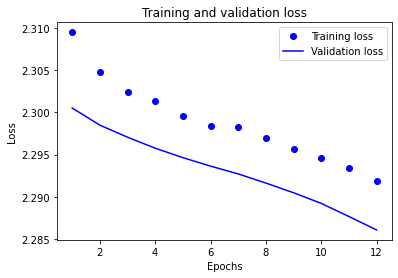

In [15]:
history_dict = history.history

#plot loss
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

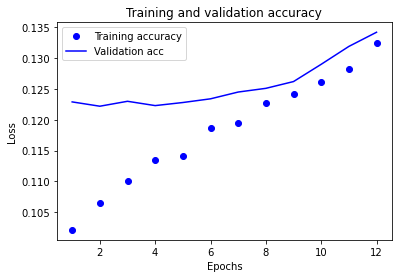

In [16]:
# plot the learning curves

#plot accuracy
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, history_dict['accuracy'], 'bo', label = "Training accuracy")
plt.plot(epochs, history_dict['val_accuracy'], 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [ ]:
print(len(y_train))

# Exercise 2 : dogs vs cats

In [19]:
import os
from matplotlib.image import imread
import random
import numpy as np

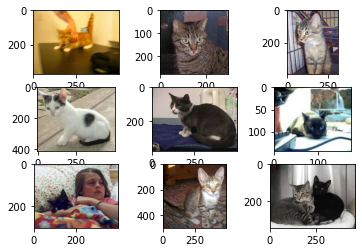

In [20]:
# define location of dataset
folder = 'catsDogsSmall'

# display some photos of dogs and  cats
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = folder + '/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
    
# show the figure
plt.show()

In [34]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os

'''
Load all of the images, resize them, and store them as a numpy array. 
The label is determined for each photo based on the filenames; labels are stored as a numpy array.
'''

photos, labels = list(), list()

# target_size
img_height = 200
img_width = 200
epochs = 20

for file in os.listdir(folder):
    
    # determine the class (binary problem)
    raw_label = file.split('.')[0]
    label = 0
    if raw_label == "cat":
        label = 1
    # load photos using load_img()
    image = load_img("catsDogsSmall/" + file, target_size=(img_height,img_width))
    # convert to numpy array using img_to_array()
    image = img_to_array(image)
    # append
    photos.append(image)
    labels.append(label)
    
# convert to numpy arrays
array_labels = np.array(labels)
array_photos = np.array(photos, dtype=object)

In [36]:
print(len(array_photos))

2000


In [37]:
from sklearn.model_selection import train_test_split

# split data into train, validation and test sets
x_train, x_test, y_train, y_test = train_test_split(array_photos, array_labels, test_size = 0.2, random_state = 42)

In [38]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# use ImageDataGenerator and ImageDataGenerator.flow() to create train, validation, and test iterators 
# refer to the documentation: https://keras.io/api/preprocessing/image/
datagen = ImageDataGenerator(rescale = 1.0/255.0)
#y_train = keras.utils.to_categorical(y_train)
train_iterator = datagen.flow(x_train, y_train, batch_size=64)
test_iterator = datagen.flow(x_test,y_test, batch_size=64)

In [39]:
# define a cnn model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

def define_cnn_model():
    # model architecture
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', 
                     padding='same',input_shape=(img_height,img_width,3)))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform', 
                     padding='same',input_shape=(img_height,img_width,3)))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation = 'elu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    return model
model = define_cnn_model()

In [40]:
# compile model using model.compile() 
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer = opt,loss = "binary_crossentropy", metrics=['accuracy'])

# fit model using model.fit()
history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), batch_size = 128, epochs = epochs, verbose =1, validation_data = (test_iterator))

Epoch 1/20
25/25 [==============================] - 71s 3s/step - loss: 2.7270 - accuracy: 0.4977 - val_loss: 0.6842 - val_accuracy: 0.5675
Epoch 2/20
25/25 [==============================] - 70s 3s/step - loss: 0.7209 - accuracy: 0.5540 - val_loss: 0.6741 - val_accuracy: 0.5675
Epoch 3/20
25/25 [==============================] - 69s 3s/step - loss: 0.6736 - accuracy: 0.5824 - val_loss: 0.6604 - val_accuracy: 0.5700
Epoch 4/20
25/25 [==============================] - 71s 3s/step - loss: 0.6163 - accuracy: 0.6678 - val_loss: 0.6401 - val_accuracy: 0.6050
Epoch 5/20
25/25 [==============================] - 72s 3s/step - loss: 0.5991 - accuracy: 0.6785 - val_loss: 0.6402 - val_accuracy: 0.6000
Epoch 6/20
25/25 [==============================] - 72s 3s/step - loss: 0.5655 - accuracy: 0.7275 - val_loss: 0.6175 - val_accuracy: 0.6275
Epoch 7/20
25/25 [==============================] - 71s 3s/step - loss: 0.5299 - accuracy: 0.7553 - val_loss: 0.6036 - val_accuracy: 0.6575
Epoch 8/20
25/25 [==

<function matplotlib.pyplot.show(close=None, block=None)>

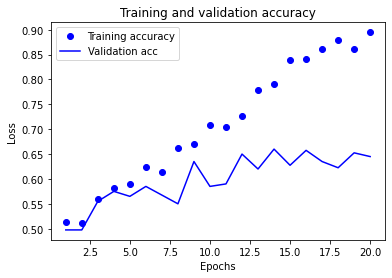

In [26]:
# plot the learning curves

#plot accuracy
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, history_dict['accuracy'], 'bo', label = "Training accuracy")
plt.plot(epochs, history_dict['val_accuracy'], 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

Text(0.5, 1.0, 'Training and validation loss')

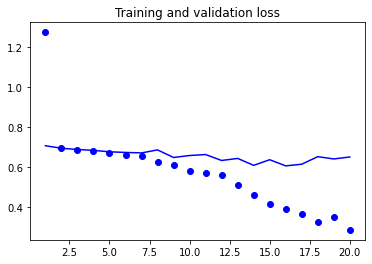

In [27]:
#plot loss
plt.plot(epochs, history_dict['loss'], 'bo', label = "Training accuracy")
plt.plot(epochs, history_dict['val_loss'], 'b', label = 'Validation acc')
plt.title('Training and validation loss')

In [28]:
# evaluate model using model.evaluate()
model.evaluate(train_iterator, verbose = 2)

25/25 - 5s - loss: 0.2575 - accuracy: 0.9381


[0.257531076669693, 0.9381250143051147]

## VGG16 Model

In [76]:
photos, labels = list(), list()
epochs = 10
for file in os.listdir(folder):
    
    # determine the class (binary problem)
    raw_label = file.split('.')[0]
    label = 0
    if raw_label == "cat":
        label = 1
    # load photos using load_img()
    image = load_img("catsDogsSmall/" + file, target_size=(244,244))
    # convert to numpy array using img_to_array()
    image = img_to_array(image)
    # append
    photos.append(image)
    labels.append(label)
    
# convert to numpy arrays
array_labels = np.array(labels)
array_photos = np.array(photos, dtype=object)

In [77]:
trained_photos = keras.applications.vgg16.preprocess_input(array_photos)

In [81]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd


# use ImageDataGenerator and ImageDataGenerator.flow() to create train, validation, and test iterators 
# refer to the documentation: https://keras.io/api/preprocessing/image/
datagen = ImageDataGenerator(rescale = 1.0/255.0)
#y_train = keras.utils.to_categorical(y_train)
train_iterator = datagen.flow(x_train, y_train, batch_size=64)
test_iterator = datagen.flow(x_test,y_test, batch_size=64)

In [82]:
type(train_iterator)

tensorflow.python.keras.preprocessing.image.NumpyArrayIterator

In [83]:
# transfer learning using VGG16 model
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Model
from keras.optimizers import SGD

def transfer_model():
    # load VGG16 model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [84]:
model = transfer_model()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [85]:
# compile model using model.compile() 
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer = opt,loss = "binary_crossentropy", metrics=['accuracy'])

In [87]:
# fit model using model.fit()
history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), batch_size = 128, epochs = 10, verbose =1, validation_data = (test_iterator))

Epoch 1/10
25/25 [==============================] - 96s 4s/step - loss: 0.2266 - accuracy: 0.9094 - val_loss: 0.3293 - val_accuracy: 0.8350
Epoch 2/10
25/25 [==============================] - 96s 4s/step - loss: 0.1962 - accuracy: 0.9212 - val_loss: 0.2899 - val_accuracy: 0.8875
Epoch 3/10
25/25 [==============================] - 98s 4s/step - loss: 0.1708 - accuracy: 0.9394 - val_loss: 0.2428 - val_accuracy: 0.8950
Epoch 4/10
25/25 [==============================] - 97s 4s/step - loss: 0.1357 - accuracy: 0.9606 - val_loss: 0.2289 - val_accuracy: 0.9100
Epoch 5/10
25/25 [==============================] - 97s 4s/step - loss: 0.1267 - accuracy: 0.9619 - val_loss: 0.2266 - val_accuracy: 0.9100
Epoch 6/10
25/25 [==============================] - 97s 4s/step - loss: 0.1114 - accuracy: 0.9700 - val_loss: 0.2225 - val_accuracy: 0.9175
Epoch 7/10
25/25 [==============================] - 96s 4s/step - loss: 0.1366 - accuracy: 0.9513 - val_loss: 0.2894 - val_accuracy: 0.8600
Epoch 8/10
25/25 [==

<function matplotlib.pyplot.show(close=None, block=None)>

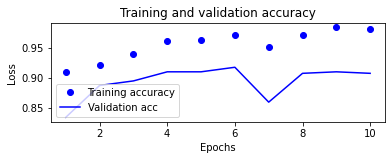

In [90]:
# plot the learning curves
epochs = range(1, len(history_dict['accuracy']) + 1)

#plot accuracy
history_dict = history.history
plt.plot(epochs, history_dict['accuracy'], 'bo', label = "Training accuracy")
plt.plot(epochs, history_dict['val_accuracy'], 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show


Text(0.5, 1.0, 'Training and validation loss')

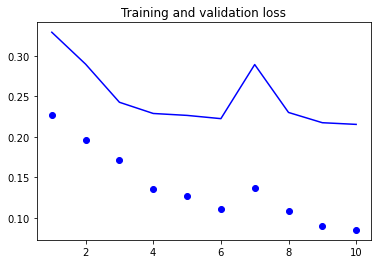

In [91]:
#plot loss
plt.plot(epochs, history_dict['loss'], 'bo', label = "Training accuracy")
plt.plot(epochs, history_dict['val_loss'], 'b', label = 'Validation acc')
plt.title('Training and validation loss')

In [ ]:
type(x_train)